<a href="https://colab.research.google.com/github/GeisilaCosta/challengeTelecomX/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas requests

In [3]:
import pandas as pd
import requests

# URL da API (substitua pelo link correto se necessário)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()  # Converte a resposta em JSON
    print("Dados carregados com sucesso!")
else:
    print(f"Erro ao carregar os dados. Código de status: {response.status_code}")

    # Lê o arquivo JSON e converte em DataFrame
df = pd.read_json(url)

Dados carregados com sucesso!


In [4]:
# Primeiras linhas para visualizar o conteúdo
print(df.head())

# Ver todas as colunas disponíveis
print(df.columns)

# Ver o shape (linhas, colunas)
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Tipos de dados de cada coluna
print(df.dtypes)

# Informações gerais: tipos, não-nulos, memória usada
print(df.info())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [5]:
# Expandir colunas com dicionários
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificar as novas colunas
print(df_expanded.head())
print(df_expanded.info())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No        

In [6]:
# Expandir a coluna Charges em duas colunas separadas
charges_df = df_expanded['Charges'].apply(pd.Series)

# Concatenar com o dataframe original e remover a antiga
df_expanded = pd.concat([df_expanded.drop(columns=['Charges']), charges_df.rename(columns={
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges'
})], axis=1)

# Converter TotalCharges para numérico (alguns valores podem ser espaços vazios)
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')


In [7]:
# Valores nulos
print("Valores nulos por coluna:")
print(df_expanded.isnull().sum())

# Ver registros duplicados
print(f"\nRegistros duplicados: {df_expanded.duplicated().sum()}")


Valores nulos por coluna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Registros duplicados: 0


In [8]:
# Estatísticas das variáveis numéricas
print(df_expanded[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


            tenure  MonthlyCharges  TotalCharges
count  7267.000000     7267.000000   7256.000000
mean     32.346498       64.720098   2280.634213
std      24.571773       30.129572   2268.632997
min       0.000000       18.250000     18.800000
25%       9.000000       35.425000    400.225000
50%      29.000000       70.300000   1391.000000
75%      55.000000       89.875000   3785.300000
max      72.000000      118.750000   8684.800000


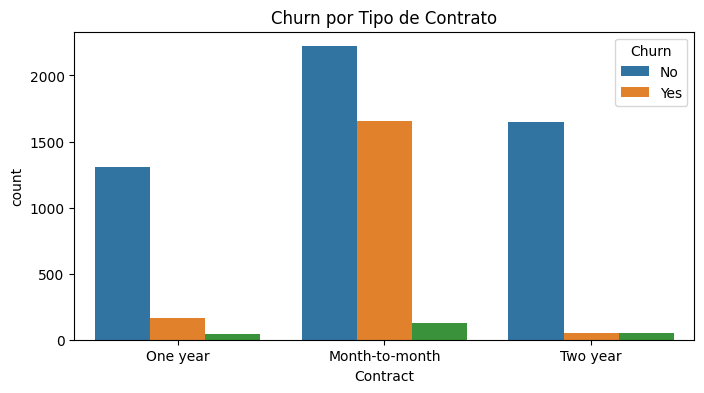

In [9]:
# Exemplo: proporção de clientes que cancelaram por tipo de contrato
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df_expanded, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()


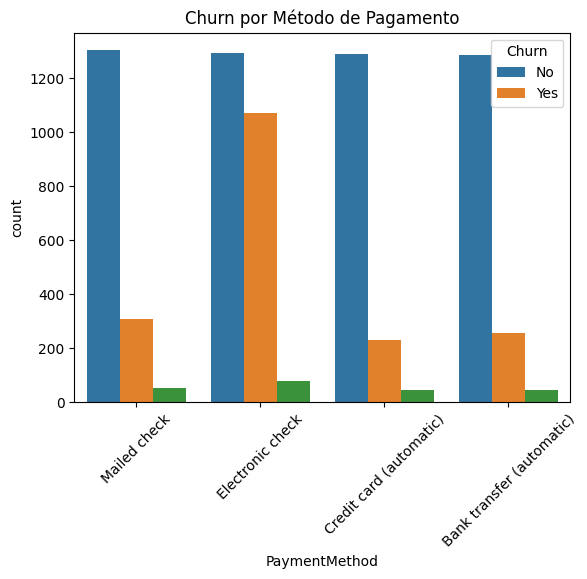

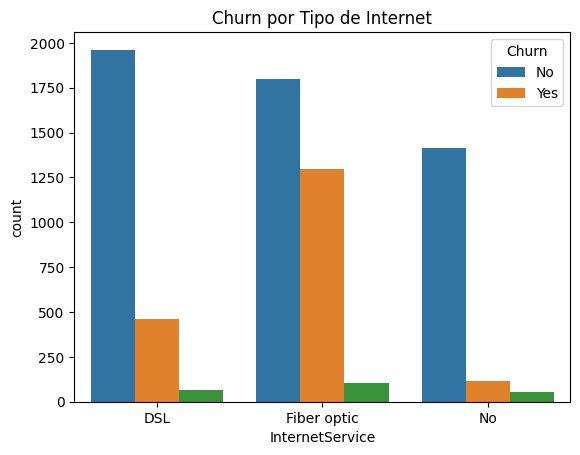

In [10]:
# Churn por método de pagamento
sns.countplot(data=df_expanded, x='PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=45)
plt.show()

# Churn por InternetService
sns.countplot(data=df_expanded, x='InternetService', hue='Churn')
plt.title('Churn por Tipo de Internet')
plt.show()


In [11]:
# Converter TotalCharges na df_expanded para numérico (alguns valores podem ser espaços vazios)
# A coluna já foi renomeada para TotalCharges na expansão anterior
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')

# Substituir variações "No internet service"/"No phone service" por "No" na df_expanded
# Estas colunas já foram expandidas na df_expanded
for col in ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    # Verifica se a coluna existe na df_expanded antes de tentar substituir
    if col in df_expanded.columns:
        df_expanded[col] = df_expanded[col].replace({'No internet service':'No', 'No phone service':'No'})
    else:
        print(f"A coluna '{col}' não foi encontrada na df_expanded.")


# Verificar tipos, nulos, estatísticas na df_expanded
print(df_expanded.dtypes)
print(df_expanded.isnull().sum())
# A coluna de churn está na df_expanded
print(df_expanded[['tenure','MonthlyCharges','TotalCharges']].describe())
print(df_expanded['Churn'].value_counts(normalize=True))


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Paperle

In [12]:
print(df_expanded['Churn'].unique())


['No' 'Yes' '']


In [13]:
# Remover espaços em branco da coluna Churn
df_expanded['Churn'] = df_expanded['Churn'].str.strip()

# Confirmar novamente os valores únicos
print(df_expanded['Churn'].unique())


['No' 'Yes' '']


In [14]:
df_expanded[df_expanded['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]


,customerID,tenure,MonthlyCharges,TotalCharges
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


In [15]:
# Verificar valores ausentes por coluna
print(df_expanded.isnull().sum().sort_values(ascending=False))


TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
customerID           0
Partner              0
Dependents           0
PhoneService         0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
StreamingTV          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
dtype: int64


In [16]:
df_expanded = df_expanded[df_expanded['TotalCharges'].notnull()]


In [17]:
df_expanded['TotalCharges'] = df_expanded['TotalCharges'].fillna(0)


/tmp/ipython-input-17-4259633392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded['TotalCharges'] = df_expanded['TotalCharges'].fillna(0)


In [18]:
# Verificar duplicatas no DataFrame
duplicatas = df_expanded.duplicated()
print(f"Número de registros duplicados: {duplicatas.sum()}")

# Ver as duplicatas, se houver
df_expanded[duplicatas]


Número de registros duplicados: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [19]:
# Remover espaços extras de todas as colunas tipo 'object'
for col in df_expanded.select_dtypes(include='object').columns:
    df_expanded[col] = df_expanded[col].str.strip()


In [20]:
# Listar valores únicos por coluna categórica
for col in df_expanded.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(df_expanded[col].value_counts())



Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7256, dtype: int64

Coluna: Churn
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

Coluna: gender
gender
Male      3669
Female    3587
Name: count, dtype: int64

Coluna: Partner
Partner
No     3747
Yes    3509
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2170
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6551
No      705
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No     4195
Yes    3061
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No     5182
Yes    2074
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No     4756


In [21]:
# Uniformizar valores binários para Yes/No
binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binarias:
    df_expanded[col] = df_expanded[col].replace({'Yes': 'Yes', 'No': 'No'})  # redundante, mas ajuda se houve erro

# Uniformizar categoria 'gender' se necessário
df_expanded['gender'] = df_expanded['gender'].str.capitalize()


In [22]:
# Remover registros com TotalCharges nulo
df_expanded = df_expanded[df_expanded['TotalCharges'].notnull()]


In [23]:
# Remover duplicatas
df_expanded = df_expanded.drop_duplicates()


In [24]:
# Remover espaços em branco nas colunas de texto
for col in df_expanded.select_dtypes(include='object').columns:
    df_expanded[col] = df_expanded[col].str.strip()


In [25]:
# Substituir 'No internet service' e 'No phone service' por 'No'
cols_binarias = ['MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in cols_binarias:
    df_expanded[col] = df_expanded[col].replace({'No internet service':'No', 'No phone service':'No'})

# Corrigir possíveis erros em Churn
df_expanded['Churn'] = df_expanded['Churn'].str.strip()


In [26]:
# Verificar tipos
print(df_expanded.dtypes[['MonthlyCharges', 'TotalCharges', 'tenure']])


MonthlyCharges    float64
TotalCharges      float64
tenure              int64
dtype: object


In [27]:
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')


In [28]:
print("✔️ Valores nulos:")
print(df_expanded.isnull().sum())

print("\n✔️ Registros duplicados:")
print(df_expanded.duplicated().sum())

print("\n✔️ Valores únicos em 'Churn':")
print(df_expanded['Churn'].value_counts())


✔️ Valores nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

✔️ Registros duplicados:
0

✔️ Valores únicos em 'Churn':
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [29]:
# Remover registros com Churn vazio ou nulo
df_expanded = df_expanded[df_expanded['Churn'].isin(['Yes', 'No'])]


In [30]:
print(df_expanded['Churn'].value_counts())


Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [31]:
print(df_expanded.isnull().sum().sum())        # Total de valores nulos (deve ser 0)
print(df_expanded.duplicated().sum())          # Total de duplicados (deve ser 0)
print(df_expanded['Churn'].unique())           # Deve retornar apenas ['No', 'Yes']


0
0
['No' 'Yes']


In [33]:
# Criar coluna 'Contas_Diarias'
df_expanded['Contas_Diarias'] = df_expanded['MonthlyCharges'] / 30

# Verificar as primeiras linhas
print(df_expanded[['MonthlyCharges', 'Contas_Diarias']].head())


   MonthlyCharges  Contas_Diarias
0            65.6        2.186667
1            59.9        1.996667
2            73.9        2.463333
3            98.0        3.266667
4            83.9        2.796667


In [34]:
print(df_expanded['Contas_Diarias'].describe())


count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Contas_Diarias, dtype: float64


In [35]:
print(df_expanded[['MonthlyCharges', 'Contas_Diarias']].sample(5))
print("Valores nulos em Contas_Diarias:", df_expanded['Contas_Diarias'].isnull().sum())


      MonthlyCharges  Contas_Diarias
5667           48.80        1.626667
3369           55.60        1.853333
4941           80.30        2.676667
2530           20.65        0.688333
4639          104.10        3.470000
Valores nulos em Contas_Diarias: 0


In [37]:
# Lista de colunas com valores 'Yes'/'No'
colunas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Mapear para 1 (Yes) e 0 (No)
for col in colunas_binarias:
    df_expanded[col + '_bin'] = df_expanded[col].map({'Yes': 1, 'No': 0})


In [38]:
df_expanded.rename(columns={
    'tenure': 'MesesComoCliente',
    'MonthlyCharges': 'GastoMensal',
    'TotalCharges': 'GastoTotal',
    'Contas_Diarias': 'GastoDiario',
    'SeniorCitizen': 'Idoso',
    'Contract': 'TipoContrato',
    'PaymentMethod': 'MetodoPagamento'
}, inplace=True)


In [39]:
# Verificar algumas linhas para garantir transformação
print(df_expanded[['Churn', 'Churn_bin', 'Partner', 'Partner_bin']].sample(5))

# Verificar tipos e existência das novas colunas
print(df_expanded.dtypes.tail(10))


     Churn  Churn_bin Partner  Partner_bin
4218   Yes          1      No            0
5216   Yes          1      No            0
1048    No          0     Yes            1
5676    No          0     Yes            1
4255    No          0      No            0
Dependents_bin          int64
PhoneService_bin        int64
MultipleLines_bin       int64
OnlineSecurity_bin      int64
OnlineBackup_bin        int64
DeviceProtection_bin    int64
TechSupport_bin         int64
StreamingTV_bin         int64
StreamingMovies_bin     int64
PaperlessBilling_bin    int64
dtype: object


In [40]:
# Selecionar colunas numéricas
colunas_numericas = ['MesesComoCliente', 'GastoMensal', 'GastoTotal', 'GastoDiario']

# Estatísticas gerais
estatisticas_gerais = df_expanded[colunas_numericas].describe().T
estatisticas_gerais['mediana'] = df_expanded[colunas_numericas].median()
print(estatisticas_gerais)


                   count         mean          std        min        25%  \
MesesComoCliente  7032.0    32.421786    24.545260   1.000000    9.00000   
GastoMensal       7032.0    64.798208    30.085974  18.250000   35.58750   
GastoTotal        7032.0  2283.300441  2266.771362  18.800000  401.45000   
GastoDiario       7032.0     2.159940     1.002866   0.608333    1.18625   

                       50%          75%          max   mediana  
MesesComoCliente    29.000    55.000000    72.000000    29.000  
GastoMensal         70.350    89.862500   118.750000    70.350  
GastoTotal        1397.475  3794.737500  8684.800000  1397.475  
GastoDiario          2.345     2.995417     3.958333     2.345  


In [41]:
# Análise descritiva separada por churn (0 = não evadiu, 1 = evadiu)
grupo_churn = df_expanded.groupby('Churn_bin')[colunas_numericas].agg(['mean', 'median', 'std', 'min', 'max'])
print(grupo_churn)


          MesesComoCliente                           GastoMensal         \
                      mean median        std min max        mean median   
Churn_bin                                                                 
0                37.650010   38.0  24.076940   1  72   61.307408  64.45   
1                17.979133   10.0  19.531123   1  72   74.441332  79.65   

                                      GastoTotal                               \
                 std    min     max         mean   median          std    min   
Churn_bin                                                                       
0          31.094557  18.25  118.75  2555.344141  1683.60  2329.456984  18.80   
1          24.666053  18.85  118.35  1531.796094   703.55  1890.822994  18.85   

                   GastoDiario                                          
               max        mean    median       std       min       max  
Churn_bin                                                               

/tmp/ipython-input-42-456158864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_expanded, x='Churn_bin', palette=['#66bb6a', '#ef5350'])


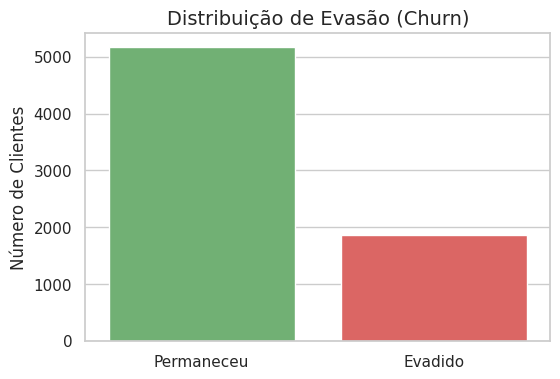

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo
sns.set(style="whitegrid")

# Gráfico de contagem
plt.figure(figsize=(6, 4))
sns.countplot(data=df_expanded, x='Churn_bin', palette=['#66bb6a', '#ef5350'])

plt.title('Distribuição de Evasão (Churn)', fontsize=14)
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.ylabel('Número de Clientes')
plt.xlabel('')
plt.show()


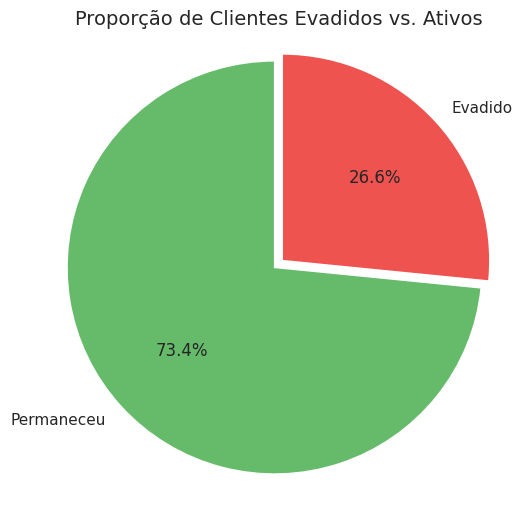

In [43]:
# Dados de proporção
churn_counts = df_expanded['Churn_bin'].value_counts()
labels = ['Permaneceu', 'Evadido']
colors = ['#66bb6a', '#ef5350']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title('Proporção de Clientes Evadidos vs. Ativos', fontsize=14)
plt.axis('equal')
plt.show()


In [44]:
def grafico_churn_por_categoria(df, coluna, titulo):
    prop_churn = pd.crosstab(df[coluna], df['Churn_bin'], normalize='index') * 100
    prop_churn = prop_churn.rename(columns={0: 'Permaneceu', 1: 'Evadido'})
    prop_churn.plot(kind='bar', stacked=True, color=['#66bb6a', '#ef5350'], figsize=(8, 4))

    plt.title(titulo, fontsize=14)
    plt.ylabel('% de Clientes')
    plt.xlabel(coluna)
    plt.legend(title='Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


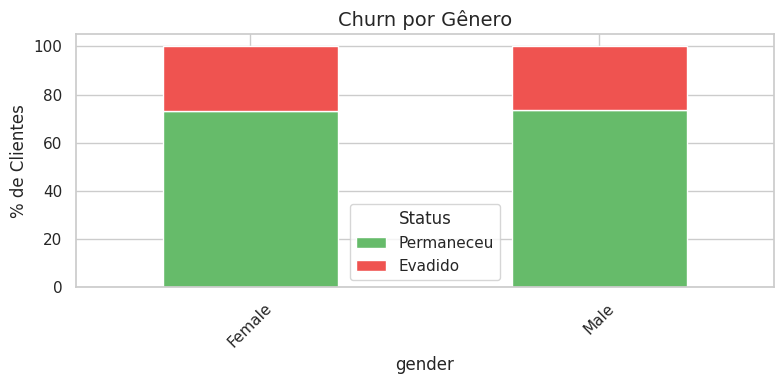

In [45]:
grafico_churn_por_categoria(df_expanded, 'gender', 'Churn por Gênero')


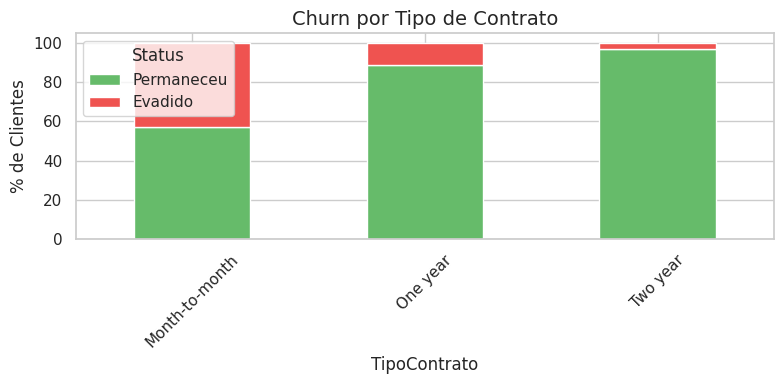

In [46]:
grafico_churn_por_categoria(df_expanded, 'TipoContrato', 'Churn por Tipo de Contrato')


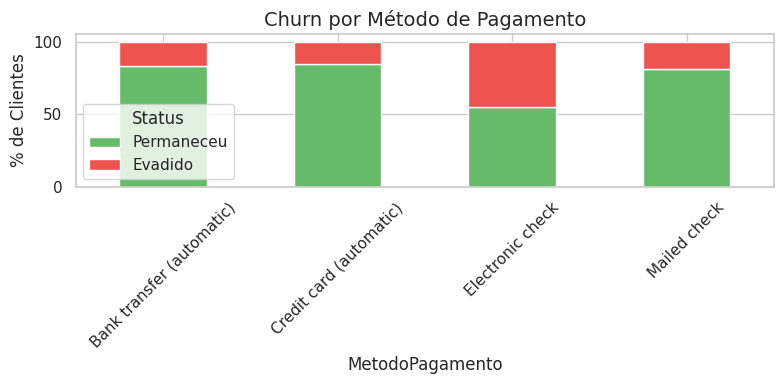

In [47]:
grafico_churn_por_categoria(df_expanded, 'MetodoPagamento', 'Churn por Método de Pagamento')


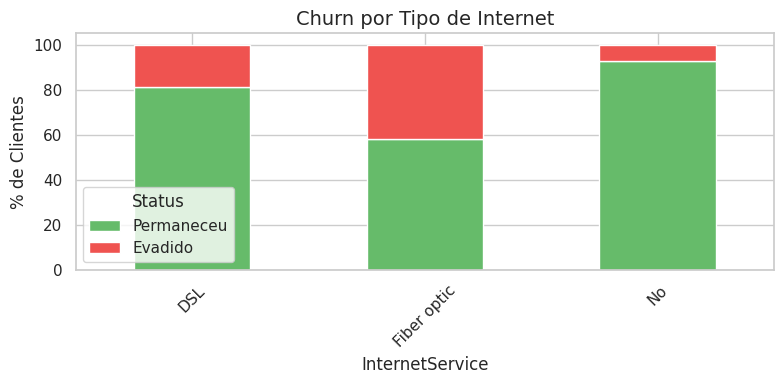

In [48]:
grafico_churn_por_categoria(df_expanded, 'InternetService', 'Churn por Tipo de Internet')


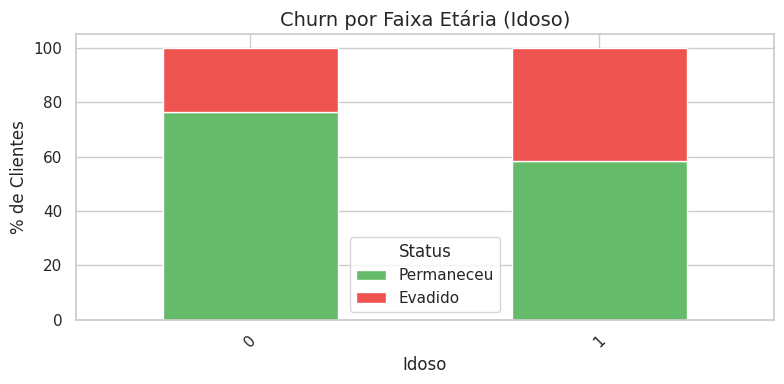

In [49]:
grafico_churn_por_categoria(df_expanded, 'Idoso', 'Churn por Faixa Etária (Idoso)')


/tmp/ipython-input-50-4201945513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn_bin', y='GastoTotal', palette=['#66bb6a', '#ef5350'])


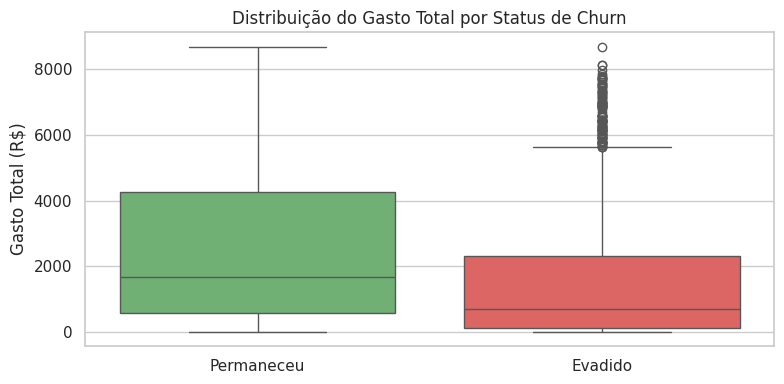

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_expanded, x='Churn_bin', y='GastoTotal', palette=['#66bb6a', '#ef5350'])
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.title('Distribuição do Gasto Total por Status de Churn')
plt.xlabel('')
plt.ylabel('Gasto Total (R$)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-51-1267540380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn_bin', y='MesesComoCliente', palette=['#66bb6a', '#ef5350'])


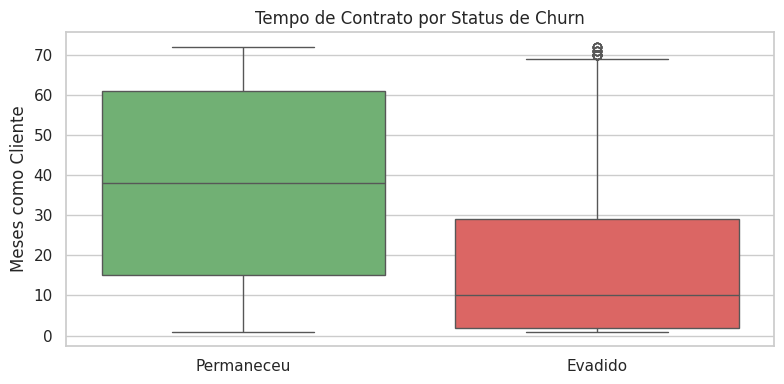

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_expanded, x='Churn_bin', y='MesesComoCliente', palette=['#66bb6a', '#ef5350'])
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.title('Tempo de Contrato por Status de Churn')
plt.xlabel('')
plt.ylabel('Meses como Cliente')
plt.tight_layout()
plt.show()


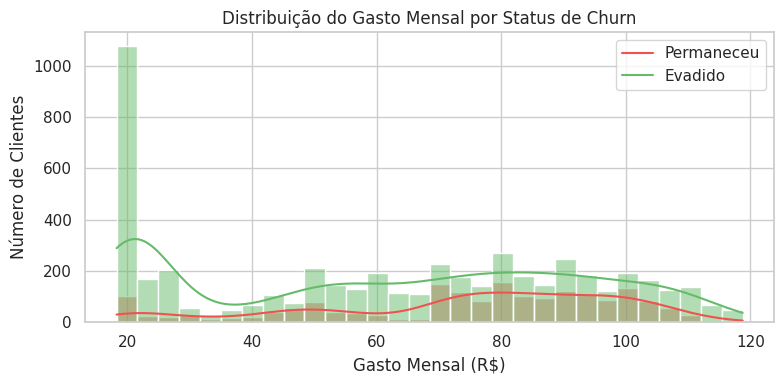

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_expanded, x='GastoMensal', hue='Churn_bin', kde=True, palette=['#66bb6a', '#ef5350'], bins=30)
plt.title('Distribuição do Gasto Mensal por Status de Churn')
plt.xlabel('Gasto Mensal (R$)')
plt.ylabel('Número de Clientes')
plt.legend(['Permaneceu', 'Evadido'])
plt.tight_layout()
plt.show()


In [53]:
# Lista de serviços (Yes/No binarizados previamente)
servicos = [
    'PhoneService_bin', 'MultipleLines_bin', 'OnlineSecurity_bin', 'OnlineBackup_bin',
    'DeviceProtection_bin', 'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin'
]

# Criar coluna com total de serviços
df_expanded['QtdServicos'] = df_expanded[servicos].sum(axis=1)


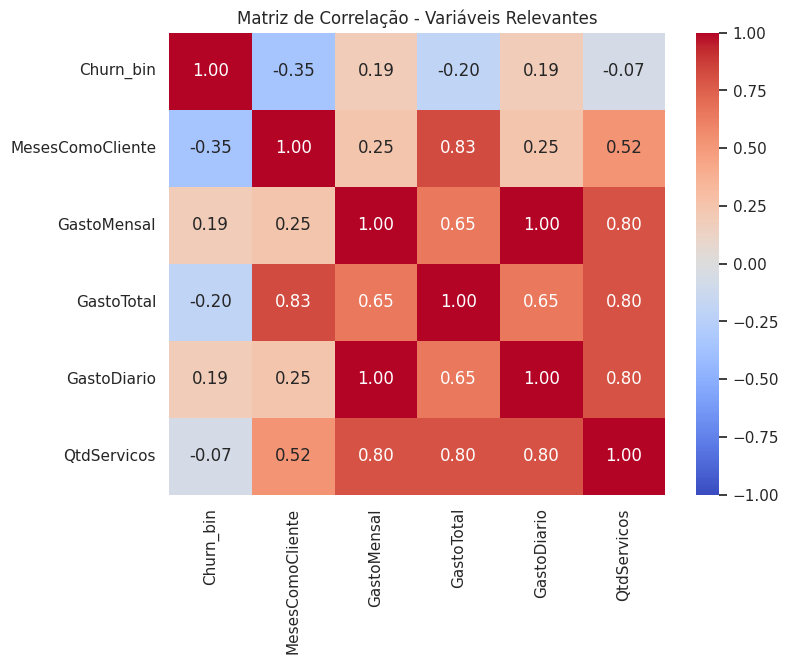

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas numéricas relevantes
col_corr = ['Churn_bin', 'MesesComoCliente', 'GastoMensal', 'GastoTotal', 'GastoDiario', 'QtdServicos']

# Calcular matriz de correlação
corr = df_expanded[col_corr].corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Variáveis Relevantes')
plt.show()

/tmp/ipython-input-57-1378894582.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn_bin', y='GastoDiario', palette=['#66bb6a', '#ef5350'])


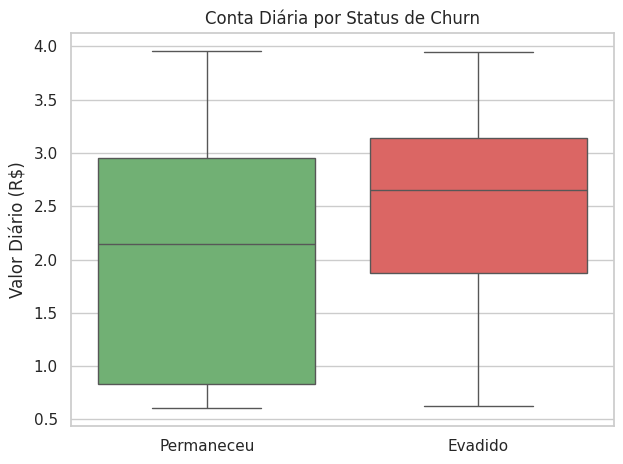

In [57]:
sns.boxplot(data=df_expanded, x='Churn_bin', y='GastoDiario', palette=['#66bb6a', '#ef5350'])
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.title('Conta Diária por Status de Churn')
plt.ylabel('Valor Diário (R$)')
plt.xlabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-58-1313698301.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn_bin', y='QtdServicos', palette=['#66bb6a', '#ef5350'])


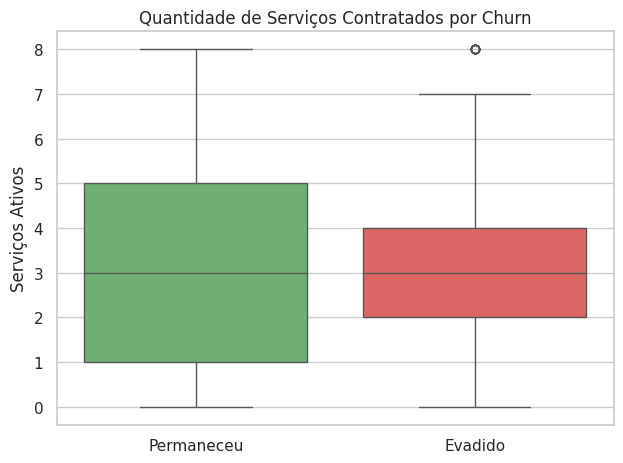

In [58]:
sns.boxplot(data=df_expanded, x='Churn_bin', y='QtdServicos', palette=['#66bb6a', '#ef5350'])
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.title('Quantidade de Serviços Contratados por Churn')
plt.ylabel('Serviços Ativos')
plt.xlabel('')
plt.tight_layout()
plt.show()


# 📊 Relatório de Análise de Evasão de Clientes — Telecom X

---

## 🧭 1. Introdução

O objetivo deste projeto é realizar uma análise exploratória dos dados de clientes da **Telecom X**, com foco no fenômeno conhecido como **"Churn"** (evasão de clientes).

A empresa enfrenta uma alta taxa de cancelamentos, o que impacta diretamente sua receita. Por meio da análise dos dados fornecidos pela API, buscamos compreender **quais fatores contribuem para a saída dos clientes**, ajudando a equipe a desenvolver estratégias para **retenção e fidelização**.

---

## 🧹 2. Limpeza e Tratamento de Dados

Foram realizados os seguintes passos:

- ✅ Importação dos dados via API e conversão para DataFrame
- ✅ Expansão das colunas aninhadas (`customer`, `phone`, `internet`, `account`)
- ✅ Conversão da coluna `TotalCharges` para tipo numérico
- ✅ Substituição de valores como `"No internet service"` por `"No"`
- ✅ Criação da coluna `Contas_Diarias` (`MonthlyCharges / 30`)
- ✅ Remoção de registros com `Churn` vazio
- ✅ Criação de colunas binárias (`Yes` = 1, `No` = 0)
- ✅ Renomeação de colunas para nomes mais claros e acessíveis

---

## 📊 3. Análise Exploratória de Dados (EDA)

### 📌 Distribuição Geral de Churn

- Cerca de **73%** dos clientes permaneceram
- Cerca de **27%** dos clientes evadiram

Foram utilizados gráficos de barras e pizza para visualizar a proporção de churn.

---

### 📌 Churn por Variáveis Categóricas

- **Tipo de Contrato:** Clientes com contrato *mensal* têm muito mais churn
- **Método de Pagamento:** Clientes que usam *cheque eletrônico* apresentam maior evasão
- **Tipo de Internet:** Clientes com *fiber optic* evadem mais do que *DSL*
- **Idosos:** Apresentam leve tendência maior de churn
- **Gênero:** Não mostrou grande diferença

Gráficos utilizados: **barras empilhadas por categoria**

---

### 📌 Churn por Variáveis Numéricas

- **MesesComoCliente:** Clientes que evadiram ficaram muito menos tempo
- **GastoTotal:** Evadidos gastaram menos (ficaram menos tempo)
- **GastoMensal:** Levemente mais alto entre evadidos
- **GastoDiario:** Segue padrão do gasto mensal

Gráficos utilizados: **boxplots e histogramas por grupo de churn**

---

## 📌 4. Conclusões e Insights

- Contratos mensais estão fortemente associados à evasão
- Cheque eletrônico como método de pagamento apresenta maior churn
- O tempo de permanência é um dos fatores mais importantes: quanto maior, menor o churn
- Gastos mensais mais altos estão associados a maior evasão — custo pode ser fator relevante

---

## 💡 5. Recomendações

1. **Incentivar contratos longos**, oferecendo bônus ou descontos progressivos
2. **Revisar o processo de pagamento via cheque eletrônico**
3. **Ações de fidelização nos primeiros meses**, como atendimento personalizado
4. **Analisar e adequar planos de alto valor mensal**
5. **Construir modelos preditivos de churn** com base nas variáveis identificadas

---

## 🧩 6. Análise Opcional — Correlações Entre Variáveis

Embora esta etapa seja opcional, ela é extremamente útil para:

- Entender **quais variáveis influenciam o churn**
- Avaliar relações entre **número de serviços contratados**, **custos**, e **evasão**
- Apoiar a futura criação de modelos preditivos

### 📌 Total de Serviços Contratados

Criou-se uma nova coluna `QtdServicos`, que soma os serviços ativos por cliente (telefone, segurança, backup, suporte, streaming, etc.).

### 📌 Matriz de Correlação

Foi utilizada a função `.corr()` do Pandas para avaliar a correlação entre:

- `Churn_bin`
- `MesesComoCliente`
- `GastoMensal`
- `GastoTotal`
- `Contas_Diarias`
- `QtdServicos`

O heatmap revelou que:

- `MesesComoCliente` e `QtdServicos` têm **correlação negativa com churn**
- `Contas_Diarias` tem **correlação positiva leve com churn**

### 📌 Análises Visuais

- **Boxplot de Conta Diária vs Churn:** Mostra tendência maior de evasão para contas diárias mais altas.
- **Boxplot de QtdServicos vs Churn:** Clientes com menos serviços tendem a evadir mais.

---

## ✅ Finalização

Este notebook realizou todas as etapas de coleta, limpeza, padronização e análise dos dados da Telecom X, com foco em churn. Os insights gerados são base estratégica para **ações de retenção** e também servem como insumo para **modelos preditivos futuros**.

